# Investigate a Soccer Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This datasource is from [Kaggle-European Soccer Database](https://www.kaggle.com/hugomathien/soccer). It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. 

>**The data consists of following:**
- +25,000 matches
- +10,000 players
- 11 European Countries with their lead championship
- Seasons 2008 to 2016
- Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
- Team line up with squad formation (X, Y coordinates)
- Betting odds from up to 10 providers
- Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches

> **Analysis aims to discover following questions:**
- Which top 10 team have high points over time?
- What are the top 10 home team over time?
- What are the top 10 away team over time?
- What is the distribution of goal difference of home team and away team, respectively?
- Best performance of home team in terms of win ratio by Season?
- Best performance of away team in terms of win ratio by Season?
- What is the relationship of sprint_speed and acceleration?
- What team attributes lead to the most home_team victories?
- Which players had the most penalties?
- What is the relationship of vision and free_kick_accuracy?

In [687]:
# Importing Libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, the following tasks are performed: 
- Loading the data 
- Cleaning of dataset for analysis.

### General Properties

In [688]:
# Creating connection to the database
con = sqlite3.connect('D:\database.sqlite')

# Extracting all the data from each table.
country = pd.read_sql('SELECT * FROM Country', con)
league = pd.read_sql('SELECT * FROM League', con)
match = pd.read_sql('SELECT * FROM Match', con)
player = pd.read_sql('SELECT * FROM Player', con)
pa = pd.read_sql('SELECT * FROM Player_Attributes', con)
team = pd.read_sql('SELECT * FROM Team', con)
ta = pd.read_sql('SELECT * FROM Team_Attributes', con)

In [689]:
# Info on country data frame.
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [690]:
# Info on league data frame.
league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [691]:
# Info on match data frame.
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [692]:
# Info on player data frame.
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [693]:
# Info on player attributes data frame.
pa.info

<bound method DataFrame.info of             id  player_fifa_api_id  player_api_id                 date  \
0            1              218353         505942  2016-02-18 00:00:00   
1            2              218353         505942  2015-11-19 00:00:00   
2            3              218353         505942  2015-09-21 00:00:00   
3            4              218353         505942  2015-03-20 00:00:00   
4            5              218353         505942  2007-02-22 00:00:00   
...        ...                 ...            ...                  ...   
183973  183974              102359          39902  2009-08-30 00:00:00   
183974  183975              102359          39902  2009-02-22 00:00:00   
183975  183976              102359          39902  2008-08-30 00:00:00   
183976  183977              102359          39902  2007-08-30 00:00:00   
183977  183978              102359          39902  2007-02-22 00:00:00   

        overall_rating  potential preferred_foot attacking_work_rate  \
0      

In [694]:
# Info on team data frame.
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [695]:
# Info on team attributes data frame.
ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

#### Merging Data Frames

Since every data frames have different attributes therefore, merging the dataframes will leave a lot of null values and removing them is difficult. We will get a merged data easily using primary and foreign keys in SQL. We can perform following SQL queries from database to get the data.

> with t1 as (select c.name country_name, l.name league_name, m.id match_id, m.date, m.season, m.stage,
m.home_team_goal, m.away_team_goal, t1.defencepressure, t1.defencepressureclass, t1.defenceaggression, t1.defenceaggressionclass, t1.defenceteamwidth, t1.defenceteamwidthclass, t.team_short_name home_team_abbr, t.team_long_name home_team
      from 
      country c
      join league l
      on c.id = l.country_id
      join match m
      on l.id = m.league_id
      join team t
      on m.home_team_api_id = t.team_api_id
      join team_attributes t1
      on t.team_api_id = t1.team_api_id
      order by m.date desc),
t2 as (select m.id match_id, t.team_short_name away_team_abbr, t.team_long_name away_team from match m join team t on m.away_team_api_id = t.team_api_id)
select t1.*, t2.away_team_abbr, t2.away_team from t1 join t2 on t1.match_id = t2.match_id

**Creating DataFrame with attributes.**

> Select p.id, p.player_name, p.birthday, p.height, p.weight, pa.*
From player p 
	join player_attributes pa
		ON p.player_api_id = pa.player_api_id

In [696]:
df = pd.read_sql('with t1 as (select c.name country_name, l.name league_name, m.id match_id, m.date, m.season, m.stage, m.home_team_goal, m.away_team_goal, t1.defencepressure, t1.defencepressureclass, t1.defenceaggression, t1.defenceaggressionclass, t1.defenceteamwidth, t1.defenceteamwidthclass, t.team_short_name home_team_abbr, t.team_long_name home_team from country c join league l on c.id = l.country_id join match m on l.id = m.league_id join team t on m.home_team_api_id = t.team_api_id join team_attributes t1 on t.team_api_id = t1.team_api_id order by m.date desc), t2 as (select m.id match_id, t.team_short_name away_team_abbr, t.team_long_name away_team from match m join team t on m.away_team_api_id = t.team_api_id) select t1.*, t2.away_team_abbr, t2.away_team from t1 join t2 on t1.match_id = t2.match_id', con)

df_2 = pd.read_sql('Select p.id, p.player_name, p.birthday, p.height, p.weight, pa.* From player p join player_attributes pa ON p.player_api_id = pa.player_api_id', con)

In [697]:
df.head()

,country_name,league_name,match_id,date,season,stage,home_team_goal,away_team_goal,defencepressure,defencepressureclass,defenceaggression,defenceaggressionclass,defenceteamwidth,defenceteamwidthclass,home_team_abbr,home_team,away_team_abbr,away_team
0,Switzerland,Switzerland Super League,25945,2016-05-25 00:00:00,2015/2016,36,0,1,38,Medium,53,Press,55,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich
1,Switzerland,Switzerland Super League,25945,2016-05-25 00:00:00,2015/2016,36,0,1,47,Medium,58,Press,53,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich
2,Switzerland,Switzerland Super League,25945,2016-05-25 00:00:00,2015/2016,36,0,1,47,Medium,58,Press,53,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich
3,Switzerland,Switzerland Super League,25945,2016-05-25 00:00:00,2015/2016,36,0,1,47,Medium,58,Press,53,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich
4,Switzerland,Switzerland Super League,25945,2016-05-25 00:00:00,2015/2016,36,0,1,47,Medium,58,Press,53,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich


In [698]:
df_2.head()

,id,player_name,birthday,height,weight,id,player_fifa_api_id,player_api_id,date,overall_rating,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,1,218353,505942,2016-02-18 00:00:00,67.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2,218353,505942,2015-11-19 00:00:00,67.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,3,218353,505942,2015-09-21 00:00:00,62.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,4,218353,505942,2015-03-20 00:00:00,61.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,5,218353,505942,2007-02-22 00:00:00,61.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [699]:
# Info on combined dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142093 entries, 0 to 142092
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   country_name            142093 non-null  object
 1   league_name             142093 non-null  object
 2   match_id                142093 non-null  int64 
 3   date                    142093 non-null  object
 4   season                  142093 non-null  object
 5   stage                   142093 non-null  int64 
 6   home_team_goal          142093 non-null  int64 
 7   away_team_goal          142093 non-null  int64 
 8   defencepressure         142093 non-null  int64 
 9   defencepressureclass    142093 non-null  object
 10  defenceaggression       142093 non-null  int64 
 11  defenceaggressionclass  142093 non-null  object
 12  defenceteamwidth        142093 non-null  int64 
 13  defenceteamwidthclass   142093 non-null  object
 14  home_team_abbr          142093 non-n

In [700]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 47 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_name          183978 non-null  object 
 2   birthday             183978 non-null  object 
 3   height               183978 non-null  float64
 4   weight               183978 non-null  int64  
 5   id                   183978 non-null  int64  
 6   player_fifa_api_id   183978 non-null  int64  
 7   player_api_id        183978 non-null  int64  
 8   date                 183978 non-null  object 
 9   overall_rating       183142 non-null  float64
 10  potential            183142 non-null  float64
 11  preferred_foot       183142 non-null  object 
 12  attacking_work_rate  180748 non-null  object 
 13  defensive_work_rate  183142 non-null  object 
 14  crossing             183142 non-null  float64
 15  finishing        

In [701]:
# Descriptive stats of the data.
df.describe()

,match_id,stage,home_team_goal,away_team_goal,defencepressure,defenceaggression,defenceteamwidth
count,142093.000000,142093.000000,142093.000000,142093.000000,142093.000000,142093.000000,142093.000000
mean,12766.872647,18.336554,1.573969,1.138079,46.550935,49.481262,52.312809
std,7488.593456,10.451842,1.308752,1.129731,10.321911,9.950873,9.596944
min,1.000000,1.000000,0.000000,0.000000,23.000000,24.000000,29.000000
25%,6283.000000,9.000000,1.000000,0.000000,39.000000,44.000000,48.000000
50%,12364.000000,18.000000,1.000000,1.000000,46.000000,48.000000,52.000000
75%,19391.000000,27.000000,2.000000,2.000000,53.000000,56.000000,59.000000
max,25979.000000,38.000000,10.000000,9.000000,72.000000,72.000000,73.000000


In [702]:
df_2.describe()

,id,height,weight,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.000000,183978.000000,183978.000000,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,5520.197785,181.878872,168.776245,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,3191.425870,6.394818,15.088920,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.000000,157.480000,117.000000,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2754.000000,177.800000,159.000000,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,5532.000000,182.880000,168.000000,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,8256.000000,185.420000,179.000000,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,11075.000000,208.280000,243.000000,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [703]:
# Checking for duplicates
sum(df.duplicated())

26746

In [704]:
sum(df_2.duplicated())

0

In [705]:
# Checking for null values
df.isnull().any(), sum(df.isnull().any())

(country_name              False
 league_name               False
 match_id                  False
 date                      False
 season                    False
 stage                     False
 home_team_goal            False
 away_team_goal            False
 defencepressure           False
 defencepressureclass      False
 defenceaggression         False
 defenceaggressionclass    False
 defenceteamwidth          False
 defenceteamwidthclass     False
 home_team_abbr            False
 home_team                 False
 away_team_abbr            False
 away_team                 False
 dtype: bool,
 0)

In [706]:
df_2.isnull().any(), sum(df.isnull().any())

(id                     False
 player_name            False
 birthday               False
 height                 False
 weight                 False
 id                     False
 player_fifa_api_id     False
 player_api_id          False
 date                   False
 overall_rating          True
 potential               True
 preferred_foot          True
 attacking_work_rate     True
 defensive_work_rate     True
 crossing                True
 finishing               True
 heading_accuracy        True
 short_passing           True
 volleys                 True
 dribbling               True
 curve                   True
 free_kick_accuracy      True
 long_passing            True
 ball_control            True
 acceleration            True
 sprint_speed            True
 agility                 True
 reactions               True
 balance                 True
 shot_power              True
 jumping                 True
 stamina                 True
 strength                True
 long_shot

### Data Cleaning

In [707]:
# Removing duplicate values

df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [708]:
df_2.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [709]:
# Renaming columns

df.rename(columns = lambda x: x.lower(), inplace = True)
for col in df.columns: 
    print(col)

country_name
league_name
match_id
date
season
stage
home_team_goal
away_team_goal
defencepressure
defencepressureclass
defenceaggression
defenceaggressionclass
defenceteamwidth
defenceteamwidthclass
home_team_abbr
home_team
away_team_abbr
away_team


In [710]:
df.rename(columns = {'defencepressure': 'defence_pressure', 'defencepressureclass': 'defence_pressure_class',\
                     'defenceaggression': 'defence_aggression','defenceaggressionclass': \
                     'defence_aggression_class', 'defenceteamwidth': 'defenceteam_width', \
                     'defenceteamwidthclass': 'defenceteam_width_class', 't2.away_team_abbr':\
                     'away_team_abbr', 't2.away_team': 'away_team'}, inplace = True)
for col in df.columns: 
    print(col)

country_name
league_name
match_id
date
season
stage
home_team_goal
away_team_goal
defence_pressure
defence_pressure_class
defence_aggression
defence_aggression_class
defenceteam_width
defenceteam_width_class
home_team_abbr
home_team
away_team_abbr
away_team


In [711]:
df_2.dtypes

id                       int64
player_name             object
birthday                object
height                 float64
weight                   int64
id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength

In [712]:
#Changing type object(String) of column 11,12,13 to int as rate can't be string and will be used further.
df_2.preferred_foot = pd.to_numeric(df_2.preferred_foot, errors="coerce")
df_2.attacking_work_rate = pd.to_numeric(df_2.attacking_work_rate, errors="coerce")
df_2.defensive_work_rate = pd.to_numeric(df_2.defensive_work_rate, errors="coerce")

In [713]:
df_2.dtypes

id                       int64
player_name             object
birthday                object
height                 float64
weight                   int64
id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot         float64
attacking_work_rate    float64
defensive_work_rate    float64
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength

In [714]:
# Fixing formats.
df.date = df.date.apply(pd.to_datetime, errors='coerce')
df.dtypes

country_name                        object
league_name                         object
match_id                             int64
date                        datetime64[ns]
season                              object
stage                                int64
home_team_goal                       int64
away_team_goal                       int64
defence_pressure                     int64
defence_pressure_class              object
defence_aggression                   int64
defence_aggression_class            object
defenceteam_width                    int64
defenceteam_width_class             object
home_team_abbr                      object
home_team                           object
away_team_abbr                      object
away_team                           object
dtype: object

In [715]:
# Converting string into datatime format in df_2
df_2.birthday = pd.to_datetime(df_2['birthday'], errors='coerce')
df_2.dtypes

id                              int64
player_name                    object
birthday               datetime64[ns]
height                        float64
weight                          int64
id                              int64
player_fifa_api_id              int64
player_api_id                   int64
date                           object
overall_rating                float64
potential                     float64
preferred_foot                float64
attacking_work_rate           float64
defensive_work_rate           float64
crossing                      float64
finishing                     float64
heading_accuracy              float64
short_passing                 float64
volleys                       float64
dribbling                     float64
curve                         float64
free_kick_accuracy            float64
long_passing                  float64
ball_control                  float64
acceleration                  float64
sprint_speed                  float64
agility     

In [716]:
# Adding columns for easier analysis

# Adding differences in goals between home team and away team.

df['home_diff'] = df.home_team_goal - df.away_team_goal
df['away_diff'] = -(df.home_team_goal - df.away_team_goal)
df.head()

,country_name,league_name,match_id,date,season,stage,home_team_goal,away_team_goal,defence_pressure,defence_pressure_class,defence_aggression,defence_aggression_class,defenceteam_width,defenceteam_width_class,home_team_abbr,home_team,away_team_abbr,away_team,home_diff,away_diff
0,Switzerland,Switzerland Super League,25945,2016-05-25,2015/2016,36,0,1,38,Medium,53,Press,55,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich,-1,1
1,Switzerland,Switzerland Super League,25945,2016-05-25,2015/2016,36,0,1,47,Medium,58,Press,53,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich,-1,1
5,Switzerland,Switzerland Super League,25945,2016-05-25,2015/2016,36,0,1,60,Medium,60,Press,60,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich,-1,1
6,Switzerland,Switzerland Super League,25947,2016-05-25,2015/2016,36,2,2,40,Medium,45,Press,50,Normal,LUZ,FC Luzern,SIO,FC Sion,0,0
7,Switzerland,Switzerland Super League,25947,2016-05-25,2015/2016,36,2,2,48,Medium,47,Press,50,Normal,LUZ,FC Luzern,SIO,FC Sion,0,0


In [717]:
# Adding wins, loses and draws for home team and away team.

home_wdl = []
away_wdl = []
for game in df.home_diff.tolist():
    if game > 0:
        home_wdl.append('w')
        away_wdl.append('l')
    elif game == 0:
        home_wdl.append('d')
        away_wdl.append('d')
    else:
        home_wdl.append('l')
        away_wdl.append('w')

df['home_wdl'] = np.array(home_wdl)
df['away_wdl'] = np.array(away_wdl)
df.head()

,country_name,league_name,match_id,date,season,stage,home_team_goal,away_team_goal,defence_pressure,defence_pressure_class,...,defenceteam_width,defenceteam_width_class,home_team_abbr,home_team,away_team_abbr,away_team,home_diff,away_diff,home_wdl,away_wdl
0,Switzerland,Switzerland Super League,25945,2016-05-25,2015/2016,36,0,1,38,Medium,...,55,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich,-1,1,l,w
1,Switzerland,Switzerland Super League,25945,2016-05-25,2015/2016,36,0,1,47,Medium,...,53,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich,-1,1,l,w
5,Switzerland,Switzerland Super League,25945,2016-05-25,2015/2016,36,0,1,60,Medium,...,60,Normal,BAS,FC Basel,GRA,Grasshopper Club Zürich,-1,1,l,w
6,Switzerland,Switzerland Super League,25947,2016-05-25,2015/2016,36,2,2,40,Medium,...,50,Normal,LUZ,FC Luzern,SIO,FC Sion,0,0,d,d
7,Switzerland,Switzerland Super League,25947,2016-05-25,2015/2016,36,2,2,48,Medium,...,50,Normal,LUZ,FC Luzern,SIO,FC Sion,0,0,d,d


**In European Championship points table are created.**

We will create a points table and number of wins and loose.

>**Win = 3 Points, Loose = 0 Points, Draw = 1 Points**

In [718]:
# Adding score/points for home team and away team, win = 3, draw = 1, lose = 0 for European Championship.

home_score = []
away_score = []
home_win = []
away_win = []

for wdl in df.home_wdl:
    if wdl == 'w':
        home_score.append(3)
        away_score.append(0)
        home_win.append(1)
        away_win.append(0)
    elif wdl == 'd':
        home_score.append(1)
        away_score.append(1)
        home_win.append(0)
        away_win.append(0)
    else: 
        home_score.append(0)
        away_score.append(3)
        home_win.append(0)
        away_win.append(1)
        
df['home_score'] = np.array(home_score)
df['away_score'] = np.array(away_score)
df['home_win'] = np.array(home_win)
df['away_win'] = np.array(away_win)

df.head()

,country_name,league_name,match_id,date,season,stage,home_team_goal,away_team_goal,defence_pressure,defence_pressure_class,...,away_team_abbr,away_team,home_diff,away_diff,home_wdl,away_wdl,home_score,away_score,home_win,away_win
0,Switzerland,Switzerland Super League,25945,2016-05-25,2015/2016,36,0,1,38,Medium,...,GRA,Grasshopper Club Zürich,-1,1,l,w,0,3,0,1
1,Switzerland,Switzerland Super League,25945,2016-05-25,2015/2016,36,0,1,47,Medium,...,GRA,Grasshopper Club Zürich,-1,1,l,w,0,3,0,1
5,Switzerland,Switzerland Super League,25945,2016-05-25,2015/2016,36,0,1,60,Medium,...,GRA,Grasshopper Club Zürich,-1,1,l,w,0,3,0,1
6,Switzerland,Switzerland Super League,25947,2016-05-25,2015/2016,36,2,2,40,Medium,...,SIO,FC Sion,0,0,d,d,1,1,0,0
7,Switzerland,Switzerland Super League,25947,2016-05-25,2015/2016,36,2,2,48,Medium,...,SIO,FC Sion,0,0,d,d,1,1,0,0


In [719]:
# Dimensions of final data sets after cleaning data.

df.shape

(115347, 26)

In [720]:
df_2.shape

(183978, 47)

<a id='eda'></a>
## Exploratory Data Analysis


### Which top 10 team have high points over time? 

In [721]:
# Taking sum of points of all the teams at their home.
home_team_score = df.groupby(['home_team'])['home_score'].sum()

# Taking sum of points of all the teams when they were away.
away_team_score = df.groupby(['away_team'])['away_score'].sum()

In [722]:
# Sum of all the points of home teams
home_team_score

home_team
1. FC Kaiserslautern         210
1. FC Köln                   635
1. FC Nürnberg               666
1. FSV Mainz 05             1164
AC Ajaccio                   201
                            ... 
Xerez Club Deportivo          66
Zagłębie Lubin               528
Zawisza Bydgoszcz             44
Évian Thonon Gaillard FC     312
Śląsk Wrocław               1272
Name: home_score, Length: 285, dtype: int32

In [723]:
# Sum of all the points of away teams
away_team_score

away_team
1. FC Kaiserslautern        200
1. FC Köln                  619
1. FC Nürnberg              463
1. FSV Mainz 05             785
AC Ajaccio                  147
                           ... 
Xerez Club Deportivo         47
Zagłębie Lubin              372
Zawisza Bydgoszcz           119
Évian Thonon Gaillard FC    264
Śląsk Wrocław               489
Name: away_score, Length: 296, dtype: int32

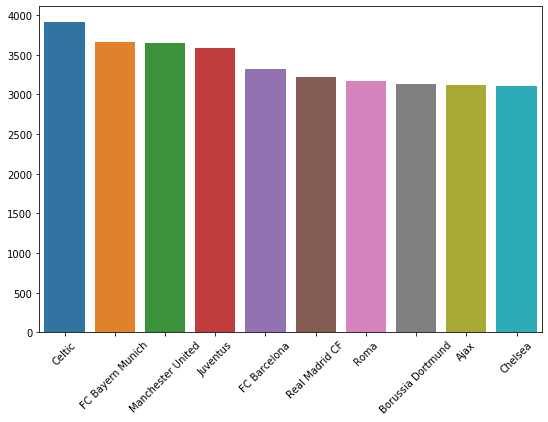

In [724]:
# Total Score 
team_total_score = away_team_score + home_team_score
    
# Finding top 10
team_total_score_10 = team_total_score.nlargest(n = 10)

# Plot
plt.subplots(figsize=(9,6))
plt.xticks(rotation = 45)
sns.barplot(team_total_score_10.index, team_total_score_10);

### What are the top 10 home team over time?

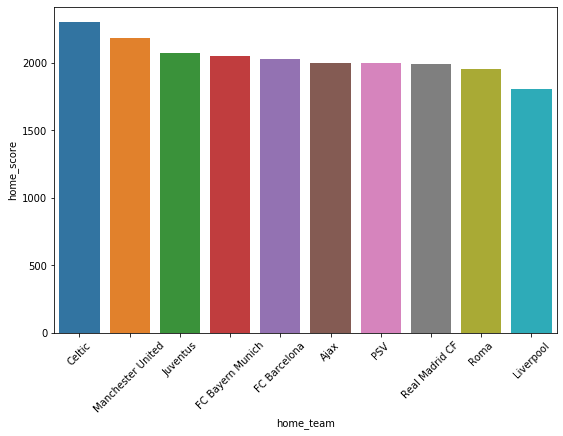

In [725]:
# Find the top 10
home_team_score_10 = home_team_score.nlargest(n = 10)

# Plot
plt.subplots(figsize=(9,6))
plt.xticks(rotation = 45)
sns.barplot(home_team_score_10.index, home_team_score_10);

### What are the top 10 away team over time?

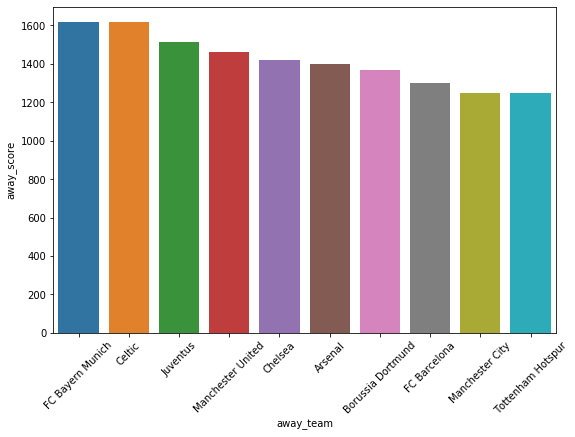

In [726]:
# Find the top 10
away_team_score_10 = away_team_score.nlargest(n = 10)

# Plot
plt.subplots(figsize=(9,6))
plt.xticks(rotation = 45)
sns.barplot(away_team_score_10.index, away_team_score_10);

### What is the distribution of goal difference of home team and away team, respectively?

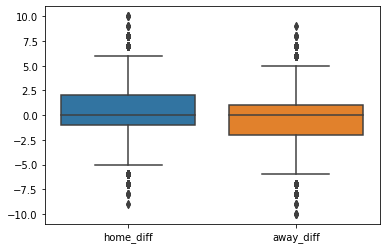

In [727]:
# Boxplot
sns.boxplot(data=df.loc[:,'home_diff':'away_diff']);

### Best performance of home team in terms of win ratio by Year?

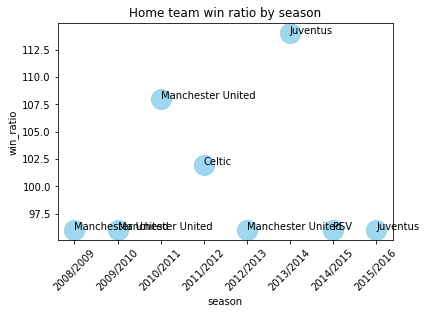

In [728]:
# Convert w,d,l into numbers as 1, 0, 0

df_new = df.copy()

df_new['home_wdl'].replace(['w'], 1, inplace = True)
df_new['home_wdl'].replace(['l', 'd'], 0, inplace = True)

# Calculate win ratio home team 
home_win_ratio = df_new.groupby(['season', 'home_team'])['home_wdl'].sum()
df_new.groupby(['season', 'home_team'])['home_wdl'].count()
home_win_ratio.index.levels[0]
topteam1 = pd.DataFrame(columns=['season','home_team','win_ratio'])
season1=[]
home_team1=[]
win_ratio1=[]

for ind in home_win_ratio.index.levels[0]:
    for i in range(0,1):
        season1.append(ind)
        home_team1.append(home_win_ratio.loc[ind].sort_values(ascending=False).index[i])
        win_ratio1.append(home_win_ratio.loc[ind].sort_values(ascending=False).values[i])

topteam1['season'] = season1                    
topteam1['home_team'] = home_team1
topteam1['win_ratio'] = win_ratio1
p1=sns.regplot(data=topteam1, x="season", y="win_ratio", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':400})
plt.title('Home team win ratio by season')
# Set x-axis label
plt.xlabel('season')
# Set y-axis label
plt.ylabel('win_ratio')
plt.xticks(rotation = 45)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
        

label_point(topteam1.season, topteam1.win_ratio,topteam1.home_team, plt.gca())

### Best performance of away team in terms of win ratio by Season?

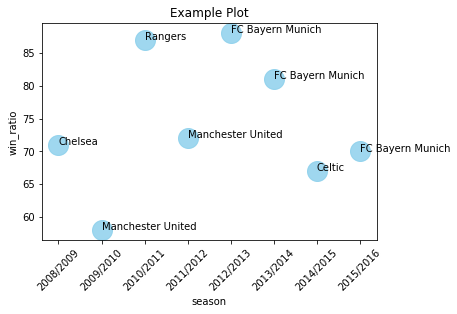

In [729]:
# Same as home team done above
df_new['away_wdl'].replace(['w'], 1, inplace = True)
df_new['away_wdl'].replace(['l', 'd'], 0, inplace = True)

# Calculate win ratio away team 

away_win_ratio = df_new.groupby(['season', 'away_team'])['away_wdl'].sum()
df_new.groupby(['season', 'away_team'])['away_wdl'].count()

away_win_ratio.index.levels[0]
away_topteam1 = pd.DataFrame(columns=['season','home_team','win_ratio'])
away_season1=[]
away_team1=[]
away_win_ratio1=[]

for ind in away_win_ratio.index.levels[0]:
    for i in range(0,1):
        away_season1.append(ind)
        away_team1.append(away_win_ratio.loc[ind].sort_values(ascending=False).index[i])
        away_win_ratio1.append(away_win_ratio.loc[ind].sort_values(ascending=False).values[i])

away_topteam1['season'] = away_season1                    
away_topteam1['away_team'] = away_team1
away_topteam1['win_ratio'] = away_win_ratio1
p1=sns.regplot(data=away_topteam1, x="season", y="win_ratio", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':400})

plt.title('Example Plot')
# Set x-axis label
plt.xlabel('season')
# Set y-axis label
plt.ylabel('win_ratio')
plt.xticks(rotation = 45)

def label_point1(x, y, val, ax):
    b = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in b.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
        
label_point1(away_topteam1.season, away_topteam1.win_ratio,away_topteam1.away_team, plt.gca())

### What is the relationship of Sprint Speed and Acceleration?

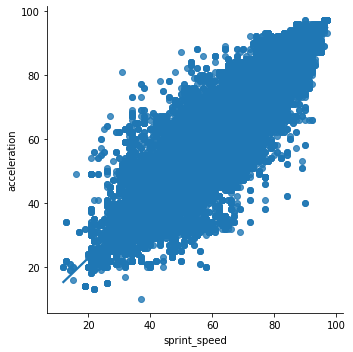

In [730]:
sns.lmplot(x='sprint_speed', y='acceleration', data=df_2);

### What team attributes lead to the most home team victories?

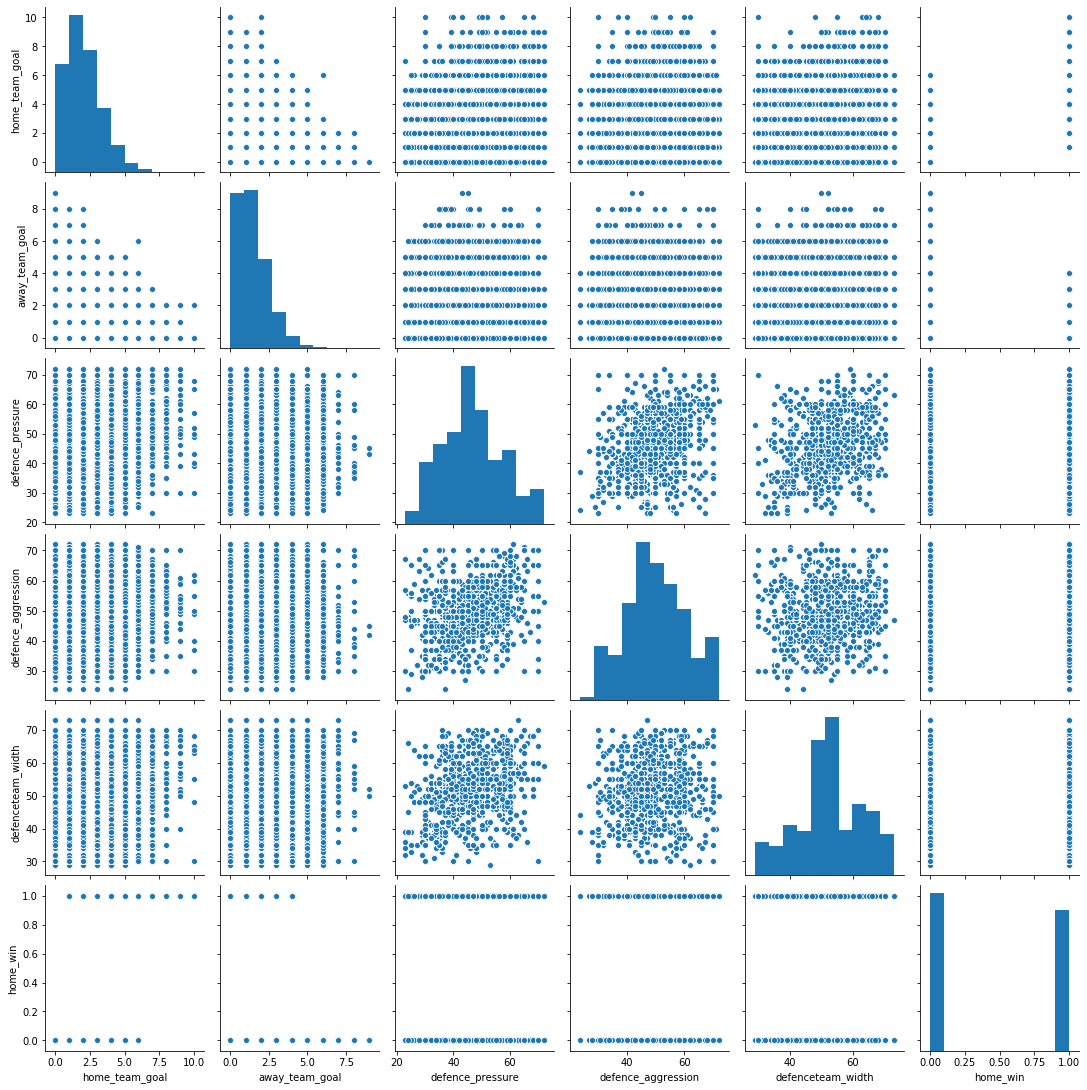

In [731]:
df_vct = df.copy()
df_vct.drop(df_vct.columns[np.r_[0:6, 9, 11, 13, 14:24, 25]], axis=1, inplace = True)
sns.pairplot(df_vct);

### Which players had the most penalties?

In [732]:
df_2.penalties.idxmax()

149591

In [733]:
df_2.iloc[149591]

id                                    8981
player_name                 Rickie Lambert
birthday               1982-02-16 00:00:00
height                              187.96
weight                                 170
id                                  149592
player_fifa_api_id                   13879
player_api_id                        39225
date                   2016-03-10 00:00:00
overall_rating                          75
potential                               75
preferred_foot                         NaN
attacking_work_rate                    NaN
defensive_work_rate                    NaN
crossing                                67
finishing                               81
heading_accuracy                        84
short_passing                           66
volleys                                 72
dribbling                               65
curve                                   77
free_kick_accuracy                      84
long_passing                            72
ball_contro

### What is the relationship of vision and free kick accuracy?

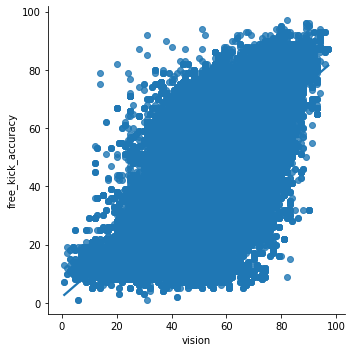

In [734]:
sns.lmplot(x='vision', y='free_kick_accuracy', data=df_2);

<a id='conclusions'></a>
## Conclusions

In this study, a good analysis has been carried out. For every step, instructions was given and interpretions was provided. The two datasets (df and df_2) contains data of european soccer match information ranging from 2008 to 2016, respectively. 

**According to above analysis,**

- Team Celic, Manchester United and Juventus are the top teams with high points over time which include all points and goals from all the seasons of the European Championship when played as home team.

- Team FC Bayern Munich, Celic and Juventus are the top teams with high points over time which include all points and goals from all the seasons of the European Championship when played as away team.

- Teams which have shown great improvement over time are : Celic, FC Bayern Munich and Manchester United.

- Player Rickie Lambert has the highest number penalities(96).

- The relationship of vision and free kick_accuracy is positively and highly correlated.

- Among many attributes of players, Potential of player has a strong postive correlation with player's overall rating.